# CSE 330 Numerical Analysis Lab 

### Lab 7: Root Finding using Newton's Mehtod

### Instructions
---

This week we will have two assignments.
1. Finding root of a polynomial using Newton's method. 
2. Finding root of system of implicit functions using Newton's method.

### Root Finding (Newton's Method):
Newton's method for root finding is basically a special case of *Fixed-point* method which converges superlinearly. In this method we define $g(x)$ as this,

$$g(x) = x - \frac{f(x)}{f^{\prime}(x)}$$

so, if after $k$-th iteration we find $x_k$, then $x_{k+1}$ is, 

$$x_{k+1} = x_k - \frac{f(x_k)}{f^{\prime}(x_k)} $$

Let's write a code for this.

[-2.         -1.92076271 -0.5819979   0.67242436  1.33033625]
[-1.9614858  -1.18624916  0.08054271  1.06719224]
           x          f(x)
0   1.000000 -1.500000e+00
1   0.250000  1.854492e+00
2   1.093250 -1.558288e+00
3   2.789289  2.348697e+02
4   2.256113  7.397253e+01
5   1.862153  2.259406e+01
6   1.588427  6.461364e+00
7   1.421501  1.564588e+00
8   1.346845  2.348554e-01
9   1.331017  9.292524e-03
10  1.330337  1.670043e-05
11  1.330336  5.427014e-11


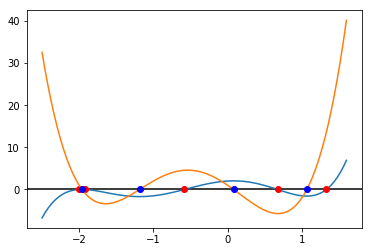

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.polynomial import Polynomial

# Define a polynomial named 'f'
f = Polynomial([2.0, 1.0, -6.0, -2.0, 2.5, 1.0])

# Define the first derivative of polynomial 'f' named 'f_prime'
f_prime = f.deriv(1)

# Draw the X-axis
plt.axhline(y=0, color='k')

# Generate 100 values of x.
x = np.linspace(-2.5, 1.6, 100)

# Calculate y-values of corresponding x-values of f(x).
y = f(x)

# Plot the graph of f(x) using x-values and y-values
plt.plot(x, y)

# Plot the roots of the graph
plt.plot(f.roots(), f(f.roots()), 'ro')

# Print the roots of the function f(x)
print(f.roots())

# Calcuate y-values for corresponding x-values of f'(x).
y = f_prime(x)

# Plot the graph of f'(x)
plt.plot(x, y)

# Plot the roots of f'(x). Notice that, where f'(x) is zero the slop of f(x) is zero.
plt.plot(f_prime.roots(), f_prime(f_prime.roots()), 'bo')

# Print the roots of f'(x).
print(f_prime.roots())

# Guli mari tor template a
# Ami nije code likhum
x_zero = 6435
list_x = [x_zero]
list_y = []

k = 0
while True:
    list_y.append(f(list_x[k]))
    
    if abs(list_y[k]) < 1e-7 or abs(f_prime(list_x[k])) < 1e-7:
        break
    else:
        list_x.append(list_x[k] - (list_y[k] / f_prime(list_x[k])))
        
    k += 1

df = pd.DataFrame({"x": list_x, "f(x)": list_y})
print(df)
plt.show()

### Solving System of equations

We can use Newton's method to solve system of implicit functions. For example. Let's take assume $y=f_1(x)$ and $y=f_2(x)$ are two functions such that,

\begin{align}
xy - y^3 - 1 &= 0\\
x^2y + y -5 &= 0
\end{align}

Let's take a look at their graphs.

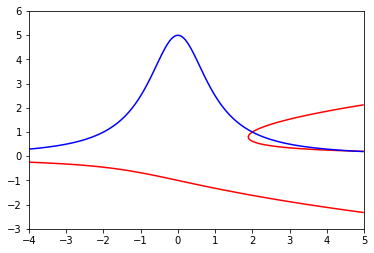

In [2]:
import matplotlib.pyplot as plt
from numpy import arange
from numpy import meshgrid

# Define a small value
delta = 0.01

# Create a set of x-values in the specified range with delta difference
# for example in this case the x values will be, -4.00, -3.99, -3.98, ... 4.99, 5.00 etc.
xrange = arange(-4, 5, delta)
yrange = arange(-3, 6, delta)

# Create a meshgrid (what is a meshgrid? it is basically co-ordinate matrix. you don't need to worry about this too much for this assignment)
# If you are interested take a look here: https://docs.scipy.org/doc/numpy/reference/generated/numpy.meshgrid.html
X, Y = meshgrid(xrange,yrange)

# Let's define two functions as F1 and F2
F1 = X*Y - Y**3 - 1
F2 = X**2*Y + Y - 5

# Draw the plots for F1 (red) and F2 (blue).
plt.contour(X, Y, (F1), [0], colors=['red'])
plt.contour(X, Y, (F2), [0], colors=['blue'])
plt.show()

Now how do we solve these pair of equations? We will use matrix representations for these equations. Let, $\boldsymbol{s} = (x, y)^T$ and $\boldsymbol{f} = \left[f_1(\boldsymbol{s}), f_2(\boldsymbol{s}) \right] ^T$. Then, we can write,

\begin{align}
0 \approx f_1(\boldsymbol{s}_{k+1}) \approx f_1(\boldsymbol{s}_k) + \frac{\partial f_1}{\partial x} \biggr\rvert_{\boldsymbol{s}_k} (x_{k+1} - x_k) + \frac{\partial f_1}{\partial y} \biggr\rvert_{\boldsymbol{s}_k} (y_{k+1} - y_k)\\
0 \approx f_2(\boldsymbol{s}_{k+1}) \approx f_2(\boldsymbol{s}_k) + \frac{\partial f_2}{\partial x} \biggr\rvert_{\boldsymbol{s}_k} (x_{k+1} - x_k) + \frac{\partial f_2}{\partial y} \biggr\rvert_{\boldsymbol{s}_k} (y_{k+1} - y_k)
\end{align}

We can rewrite this in matrix form, like this,
\begin{align}
\bigg({\begin{array}{c} 0 \\0 \end{array} }\bigg) = \bigg({\begin{array}{c} f_1(\boldsymbol{s}_k) \\f_2(\boldsymbol{s}_k) \end{array} }\bigg) + \Bigg({\begin{array}{cc} \frac{\partial f_1}{\partial x}\boldsymbol{s}_k & \frac{\partial f_1}{\partial y}\boldsymbol{s}_k \\\frac{\partial f_2}{\partial x}\boldsymbol{s}_k & \frac{\partial f_2}{\partial y}\boldsymbol{s}_k \end{array} }\Bigg)\bigg({\begin{array}{c} x_{k+1} - x_k \\y_{k+1} - y_k \end{array} }\bigg)
\end{align}

The matrix part here is called $\boldsymbol{J}\text{acobian Matrix}, J(\boldsymbol{s}_k)$. From there we can derive,

\begin{equation}
\boldsymbol{s}_{k+1} = \boldsymbol{s}_k - \boldsymbol{J}^{-1}(\boldsymbol{s}_k)\boldsymbol{f}(\boldsymbol{s}_k)
\end{equation} 

*Note:* Please refer to the class note for detailed proof.

For this purpose we will need to use `sympy` library. Let's take a look into it.

### `sympy` Library
Using `sympy` we can express mathematical expressions nicely.  

In [3]:
# These lines are included for beautification
# from google.colab.output._publish import javascript
#url = "https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.3/latest.js?config=default"
#javascript(url=url)
# Don't worry about these lines

# import sympy
import sympy as sp
import math

# Defing x and y as mathematical symbols
vars = sp.symbols('x y')
x, y = vars

# Create an expression
expr1 = sp.sqrt(5 * x**3 + 1/x)
print("Expression 1:")
display(expr1)
print()
# We can substitute values like this
print(expr1.subs({x: 4.0}))

# Create another expression 
expr2 = x**y - sp.exp(x**2)
print("\nExpression 2:")
display(expr2)
print()
print(expr2.subs({x: 0.1, y:0.2}))

# We can also differentiate
expr3 = 4*x**3 - 3*x**2 + sp.sqrt(1+x**2)
print("\nExpression 3:")
display(expr3)
print("\nd/d(x) of expr3:") 
display(sp.diff(expr3))
print()

# Similarly we can also calculate partial derivative
expr4 = 4*x**3*y**2 - 3*x**2*y**3 + (sp.sqrt(1+x**2+y**2))
print("\nExpression 4:")
display(expr4)
print("\nd/d(x) of expr4:") 
display(sp.diff(expr4, x))
print()
print("\nd/d(y) of expr4:") 
display(sp.diff(expr4, y))
print()

Expression 1:


sqrt(5*x**3 + 1/x)


17.8955301681733

Expression 2:


x**y - exp(x**2)


-0.379092822603975

Expression 3:


4*x**3 - 3*x**2 + sqrt(x**2 + 1)


d/d(x) of expr3:


12*x**2 - 6*x + x/sqrt(x**2 + 1)



Expression 4:


4*x**3*y**2 - 3*x**2*y**3 + sqrt(x**2 + y**2 + 1)


d/d(x) of expr4:


12*x**2*y**2 - 6*x*y**3 + x/sqrt(x**2 + y**2 + 1)



d/d(y) of expr4:


8*x**3*y - 9*x**2*y**2 + y/sqrt(x**2 + y**2 + 1)

Now let's try this assignment.

In [4]:
import numpy as np
import sympy as sp

# Define x and y as mathematical symbols
vars = sp.symbols('x y')
x, y = vars

# Define the functions 
f = ([x*y - y**3 - 1, x**2 * y + y - 5])

# Initialise Jacobian matrix
J = sp.zeros(len(f),len(vars))

# Fill Jacobian matrix with entries
for i, fi in enumerate(f):
    for j, s in enumerate(vars):
        J[i,j] = sp.diff(fi, s)

# Find the inverse of Jacobian Matrix
J_inv = sp.Matrix.inv(J)

# Initialize solution s with starting value x_0 = 2.0 and y_0 = 3.0
s = sp.Matrix([
    2.0,
    3.0
])

# Make a dictionary using the initial values
dictionary = {
    x: s[0],
    y: s[1]
}

# calculate f(s_k) using initial values
f_sk = sp.Matrix([
    f[0].subs(dictionary),
    f[1].subs(dictionary)
])

# Start iterating using while loop
i = 0
while i<10:
    # Calculate value of inverse jacobian, j^-1(sk), j_val
    j_val = J_inv.subs(dictionary)
    #print(j_val)


    # Calculate the new value of s using iterative formula
    s -= j_val * f_sk
    #print(s)


    # Update the dictionary using newer values
    dictionary = {
            x: s[0],
            y: s[1]
    }


    # Update f(s_k) using newer values of s_k
    f_sk = sp.Matrix([
        f[0].subs(dictionary),
        f[1].subs(dictionary)
    ])


    print(s)
    i += 1

print()

Matrix([[1.55555555555556], [2.06666666666667]])
Matrix([[1.54720541388114], [1.47779333496041]])
Matrix([[1.78053502926115], [1.15886481100565]])
Matrix([[1.95284300049945], [1.02844268807581]])
Matrix([[1.99776297310451], [1.00124040908490]])
Matrix([[1.99999523621189], [1.00000259961750]])
Matrix([[1.99999999997887], [1.00000000001153]])
Matrix([[2.00000000000000], [1.00000000000000]])
Matrix([[2.00000000000000], [1.00000000000000]])
Matrix([[2.00000000000000], [1.00000000000000]])

